In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


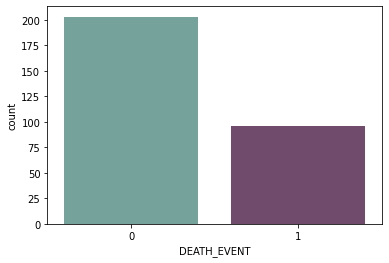

In [ ]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,-0.238646,-0.871105,0.000166,1.179830,-1.107370,-0.735688,2.464570e+00,-0.381379,0.312044,0.735688,-0.687682,0.964571
68,0.771889,-0.871105,-0.434454,-0.847579,-1.107370,-0.735688,-1.982581e-01,-0.187726,1.220084,-1.359272,-0.687682,-0.829340
222,-1.586025,1.147968,-0.511880,-0.847579,-0.260991,-0.735688,1.040981e+00,-0.284552,0.539054,0.735688,1.454161,0.912948
37,1.782424,1.147968,0.281997,1.179830,1.008578,1.359272,5.903487e-01,-0.381379,1.901114,-1.359272,-0.687682,-1.293951
16,2.203480,1.147968,-0.446842,-0.847579,-0.007077,-0.735688,-1.390846e-02,-0.478205,0.766064,0.735688,-0.687682,-1.500444
...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.014054,1.147968,-0.444777,1.179830,0.162199,1.359272,-6.386489e-01,-0.381379,-0.141976,-1.359272,-0.687682,0.538678
71,-0.238646,-0.871105,0.000166,1.179830,-0.260991,-0.735688,-1.447739e+00,-0.478205,0.539054,0.735688,1.454161,-0.764811
106,-0.491279,-0.871105,0.171536,-0.847579,0.585389,-0.735688,-3.666809e-03,-0.090900,0.085034,0.735688,-0.687682,-0.545412
270,-1.417603,-0.871105,0.000166,1.179830,-0.684180,1.359272,7.535660e-09,0.199578,-1.504036,0.735688,1.454161,1.467899


In [ ]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,0.771889,-0.871105,0.000166,-0.847579,0.162199,-0.735688,-2.174896e+00,1.264666,-0.141976,0.735688,1.454161,1.545334
265,-0.912335,1.147968,-0.293022,-0.847579,-0.260991,-0.735688,1.010256e+00,-0.478205,0.766064,0.735688,1.454161,1.416276
164,-1.333392,-0.871105,1.920336,1.179830,-0.684180,-0.735688,7.234901e-01,-0.284552,0.539054,0.735688,-0.687682,-0.016273
9,1.614001,1.147968,-0.473683,-0.847579,-0.260991,1.359272,1.276539e+00,7.752020,-0.823006,0.735688,1.454161,-1.552067
77,-1.586025,-0.871105,-0.495362,1.179830,0.162199,-0.735688,-2.699496e-01,-0.187726,0.766064,0.735688,-0.687682,-0.726094
...,...,...,...,...,...,...,...,...,...,...,...,...
132,-1.249180,-0.871105,0.141598,-0.847579,0.162199,1.359272,7.535660e-09,-0.207091,0.085034,-1.359272,-0.687682,-0.300201
72,2.035057,-0.871105,5.471619,-0.847579,-0.260991,-0.735688,-2.084997e-01,-0.381379,-1.050016,0.735688,1.454161,-0.751905
15,1.782424,1.147968,-0.209401,-0.847579,1.008578,-0.735688,-2.215863e+00,-0.090900,-0.141976,0.735688,-0.687682,-1.513350
10,1.192945,1.147968,-0.517041,-0.847579,-0.007077,1.359272,1.071706e+00,2.523407,-1.277026,0.735688,1.454161,-1.552067


In [ ]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500, validation_split=0.2)


Epoch 1/500
6/6 [==============================] - 1s 49ms/step - loss: 0.6928 - accuracy: 0.7020 - val_loss: 0.6914 - val_accuracy: 0.7857
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6915 - accuracy: 0.7301 - val_loss: 0.6898 - val_accuracy: 0.7857
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6906 - accuracy: 0.6971 - val_loss: 0.6881 - val_accuracy: 0.7857
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6887 - accuracy: 0.7418 - val_loss: 0.6865 - val_accuracy: 0.7857
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6877 - accuracy: 0.7232 - val_loss: 0.6848 - val_accuracy: 0.7857
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.7002 - val_loss: 0.6831 - val_accuracy: 0.7857
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6854 - accuracy: 0.7159 - val_loss: 0.6814 - val_accuracy: 0.7857
Epoch 8/500
6/6 [===

In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 79.68%


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

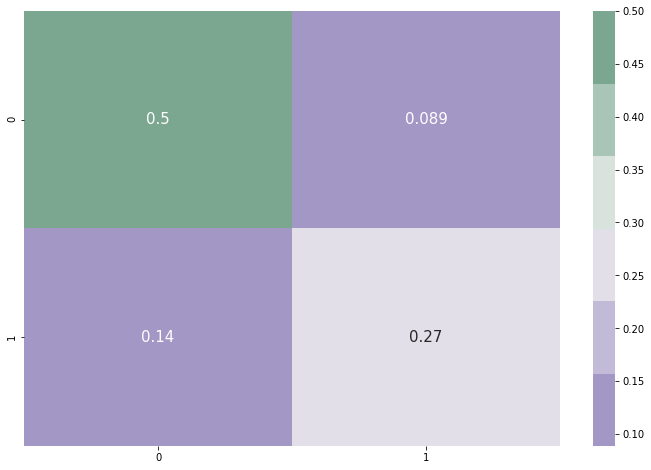

In [ ]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})